----------------------------------------

# Project: Unsupervised Learning
- **Marks: 35**

-----------------------------------------

Dear Learner, 

Welcome to the USL project.

For this exercise, we will be using the Credit Card Customer Data which has been provided separately.

---------------------------
## Background: 
-----------------------------
AllLife Bank wants to focus on its credit card customer base in the next
financial year. They have been advised by their marketing research team, that the
penetration in the market can be improved. Based on this input, the Marketing team
proposes to run personalised campaigns to target new customers as well as upsell to
existing customers. Another insight from the market research was that the customers
perceive the support services of the back poorly. Based on this, the Operations team
wants to upgrade the service delivery model, to ensure that customers queries are
resolved faster. Head of Marketing and Head of Delivery both decide to reach out to the
Data Science team for help.
Objective: To identify different segments in the existing customer based on their
spending patterns as well as past interaction with the bank.

--------------------------
## About the data:
-----------------
The data has customers as a data points with the following features-
- Sl_no - Customer Serial Number
- Customer Key - Customer identification
- Avg_Credit_Limit	- Average credit limit(currency less)
- Total_Credit_Cards	- Total number of credit cards 
- Total_visits_bank	- Total bank visits
- Total_visits_online -	 Total online visits
- Total_calls_made - Total calls made


---------------------------
## Guidelines
-----------------------------------------
- The exercise consists of semi written code blocks. You need to fill the blocks as per the instructions to achieve the required results.
- To be able to complete the assessment in the expected time, do not change the variable names. The codes might throw errors when the names are changed. 
- The marks of each requirement is mentioned in the question.
- You can raise your issues on the discussion forum on the Olympus.
- You can use Jupyter Notebook/ Google Colab(recommended) for this assessment.
- Uncomment the code snippets and work on them

--------------------------------------------
## Resources
-------------------------------------

- Kmeans documentation - https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
- GMM documentation - https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html
- DBSCAN - https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html


Wishing you all the best!

In [1]:
#Import all the necessary packages

import pandas as pd
import numpy as np

import matplotlib.pylab as plt
%matplotlib inline

import seaborn as sns
from sklearn.cluster import KMeans

import sklearn
import sklearn.metrics

In [2]:
# Just some fancy stuff to make make notebooks more presentable

import warnings
warnings.filterwarnings('ignore') # to get rid of warning messages

# Remove scientific notations and display numbers with 2 decimal points instead
pd.options.display.float_format = '{:,.2f}'.format        

# Update default background style of plots
sns.set_style(style='darkgrid')

### 1. Read the data file (1 mark)


In [3]:
# uncomment below code
df = pd.read_excel('Credit Card Customer Data.xlsx')

# Note -- if you are using google colab you can use the mount drive feature(or any other alternative) but make sure that the dataframe in which the data file is read is named 'df'.

In [4]:
df.shape

(660, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


In [6]:
# check for the duplicate 
df.duplicated().sum()

0

In [7]:
# no duplicates, lets check for missing values
df.isnull().sum()

Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

### 2. Find the number of unique entries in each of the columns. What can be inferred from the observation about the the Customer key feature? (2 marks)

- Unique entries (1 mark)
- Inferences (1 mark)

In [8]:
# No missing values. Let us now figure out the uniques in each column. 


# uncomment below code
df.nunique()


Sl_No                  660
Customer Key           655
Avg_Credit_Limit       110
Total_Credit_Cards      10
Total_visits_bank        6
Total_visits_online     16
Total_calls_made        11
dtype: int64

**Add inference from the above observation about the Customer Key feature here**

There is 655 unique Customers , total numbers are 660 so it means 5 of them are duplicate

In [9]:
# There are some duplicates in customer key. Let us explore

duplicate_keys = df['Customer Key'].duplicated()
df[duplicate_keys]

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
332,333,47437,17000,7,3,1,0
398,399,96929,67000,6,2,2,2
432,433,37252,59000,6,2,1,2
541,542,50706,60000,7,5,2,2
632,633,97935,187000,7,1,7,0


In [10]:
# let us just drop them for simplicity.

df = df[~duplicate_keys]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 655 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                655 non-null    int64
 1   Customer Key         655 non-null    int64
 2   Avg_Credit_Limit     655 non-null    int64
 3   Total_Credit_Cards   655 non-null    int64
 4   Total_visits_bank    655 non-null    int64
 5   Total_visits_online  655 non-null    int64
 6   Total_calls_made     655 non-null    int64
dtypes: int64(7)
memory usage: 40.9 KB


### 3. Drop the columns Sl_No and Customer Key(1 mark)

In [11]:
# Great, we have done some basic checks. Now let us drop the variables that are not required

# Uncomment below
df.drop(columns = ['Sl_No', 'Customer Key'], inplace = True)

In [12]:
df.head(3)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4


In [13]:
#let us check for duplicates now. Duplicates would mean customers with identical features

df[df.duplicated()]


,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
162,8000,2,0,3,4
175,6000,1,0,2,5
215,8000,4,0,4,7
295,10000,6,4,2,3
324,9000,4,5,0,4
361,18000,6,3,1,4
378,12000,6,5,2,1
385,8000,7,4,2,0
395,5000,4,5,0,1
455,47000,6,2,0,4


In [14]:
#let us drop these too
df=df[~df.duplicated()]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 644 entries, 0 to 659
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Avg_Credit_Limit     644 non-null    int64
 1   Total_Credit_Cards   644 non-null    int64
 2   Total_visits_bank    644 non-null    int64
 3   Total_visits_online  644 non-null    int64
 4   Total_calls_made     644 non-null    int64
dtypes: int64(5)
memory usage: 30.2 KB


### 4. Visualise through box plot  (5 marks)

- Extract the features(column names) of the df in a list(1 mark)
- Complete the function below that takes the above list of column names and the df and plots the boxplot for all the features(3 marks)
- Call the function with the features and the df(1 mark)

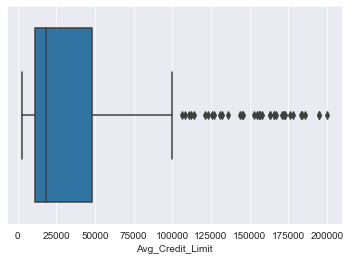

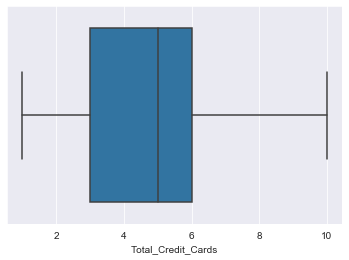

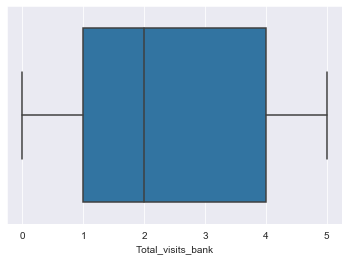

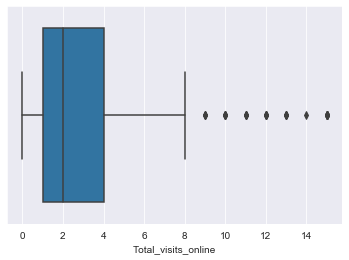

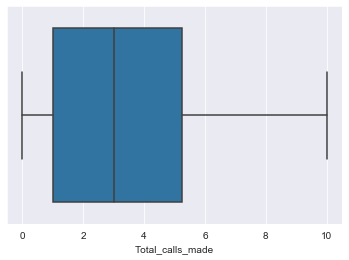

In [15]:
# Now lets go ahead with the exploring each variable at hand. We will use the boxplot for these


features = list(df.columns)
#features

# write the function below. Iterate through the features plot the boxplot for all the featrues one by one.

def boxplots_plot(features, df):
   for i in features:
     sns.boxplot(df[i])
     plt.show()
  

boxplots_plot(features, df)

# The plots are drawn for your reference.

### 5. Draw the correlation heatmap with annotation(4 marks)

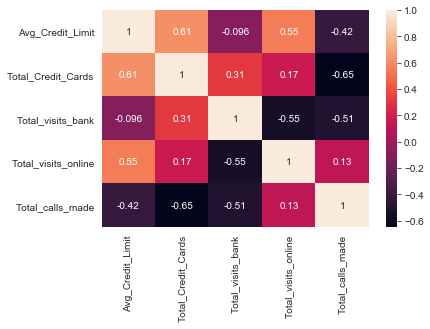

In [16]:
# We see that there are some outliers in the Average credit limit and total visits online features
# Now let us generate a correlation heatmap
sns.heatmap( df.corr(), annot = True)

### 6. Scale the dataset, create a dataframe for the scaled value and display the top 3 entries (5 marks)


In [17]:
# Let us now scale the dataset and present the scaled values in a dataframe and display the top 3

# use the fit tranform function on the original dataframe

from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
df_scaled = mms.fit_transform(df)

# creating the dataframe of scaled values
df_scaled = pd.DataFrame(df_scaled)

# use the stored feature names to define the column names for the new dataframe
df_scaled.columns = features

# print the top3 entries in the scaled data frame
df_scaled.head(3)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,0.49,0.11,0.20,0.07,0.00
1,0.24,0.22,0.00,0.67,0.90
2,0.24,0.67,0.20,0.20,0.40


In [18]:
df_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
Avg_Credit_Limit,644.00,0.16,0.19,0.00,0.04,0.08,0.23,1.00
Total_Credit_Cards,644.00,0.41,0.24,0.00,0.22,0.44,0.56,1.00
Total_visits_bank,644.00,0.48,0.33,0.00,0.20,0.40,0.80,1.00
Total_visits_online,644.00,0.17,0.20,0.00,0.07,0.13,0.27,1.00
Total_calls_made,644.00,0.36,0.29,0.00,0.10,0.30,0.53,1.00


### 7. Elbow Plot(3 marks)

#### K-Means clustering

Now that we have scaled, let us move to KMeans clustering.

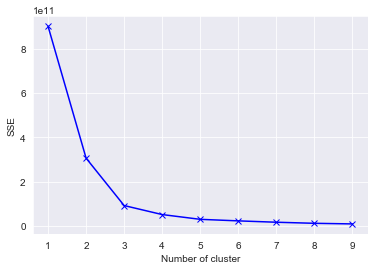

In [19]:
# Let us now fit kmeans algorithm on our scaled data and Find out the optimum number of clusters to use.

# Steps:
# 1. Inititalise a dictionary to store the SSE for each k.
# 2. Run for a range of Ks and store SSE for each run
# 3. Plot the SSE vs K and find the elbow

# step 1
sse = {} 

# step 2 - iterate for a range of Ks and fir the scaled data to the algorithm. Use inertia attribute from the clustering object and 
# store the inertia value for that k 

for k in range(1, 10):
     kmeans = KMeans(n_clusters= k, max_iter=1000, random_state=12).fit(df[features])
     sse[k] = kmeans.inertia_

# step 3

plt.figure()
plt.plot(list(sse.keys()), list(sse.values()), 'bx-')
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

### 8. Fit the KMeans clustering on the df_scaled data with n_clusters = 3 and store the predictions in the columns 'Labels' (create new column) (3 marks)

In [20]:
# Looking at the plot, we can say that for k=3 or 4, elbow point is achieved.
# We will fit the kmeans again with k=3 to get the labels

kmeans = KMeans(n_clusters=3, max_iter= 1000, random_state=12)

kmeans.fit(df_scaled)
df_scaled['Labels'] = kmeans.predict(df_scaled) 

df_scaled.head(3)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Labels
0,0.49,0.11,0.20,0.07,0.00,1
1,0.24,0.22,0.00,0.67,0.90,0
2,0.24,0.67,0.20,0.20,0.40,1


### 9. Generate the boxplot for all the features that cleary differentiates among the clusters( 2 mark)

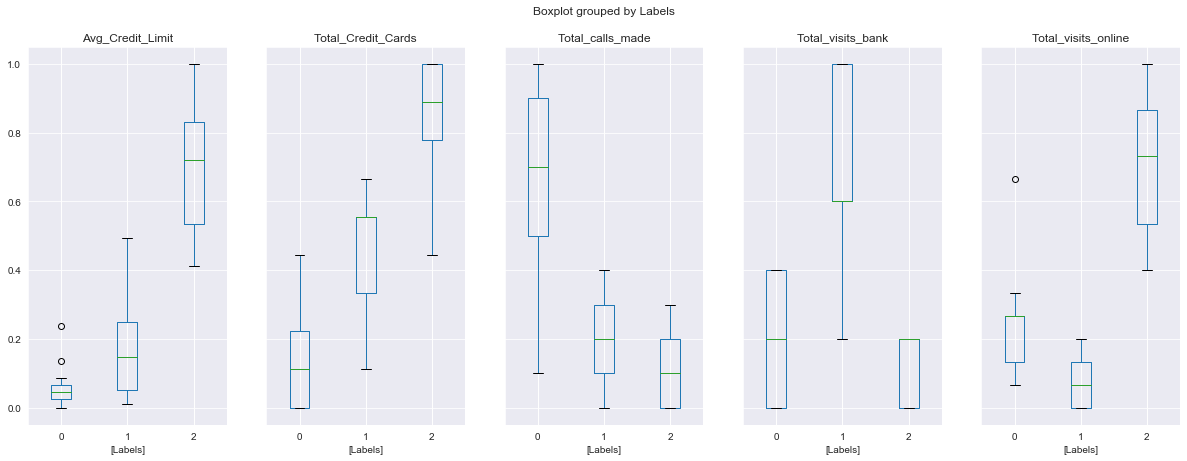

In [21]:
# We have generated the labels with kmeans. Let us look at the various features based on the labels. 
# The labels should be fed to the 'by' attribute 


df_scaled.boxplot(by = 'Labels', layout = (1,5),figsize=(20,7))
plt.show()

### 10. Implement the Gaussian Mixture Model clustering and generate the boxplot as above (3 marks)

- Fit the algorithm with 3 n_components. Predict on the scaled data and store the results as GmmLabels.(2 marks)
- Generate the boxplots to understand the clusters similar to the one generated for the kmeans.(1 mark)


In [22]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components= 3, random_state = 12)
gmm.fit(df_scaled) 
df_scaled['GmmLabels'] = gmm.predict(df_scaled)

df_scaled.head(3)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Labels,GmmLabels
0,0.49,0.11,0.20,0.07,0.00,1,1
1,0.24,0.22,0.00,0.67,0.90,0,0
2,0.24,0.67,0.20,0.20,0.40,1,1


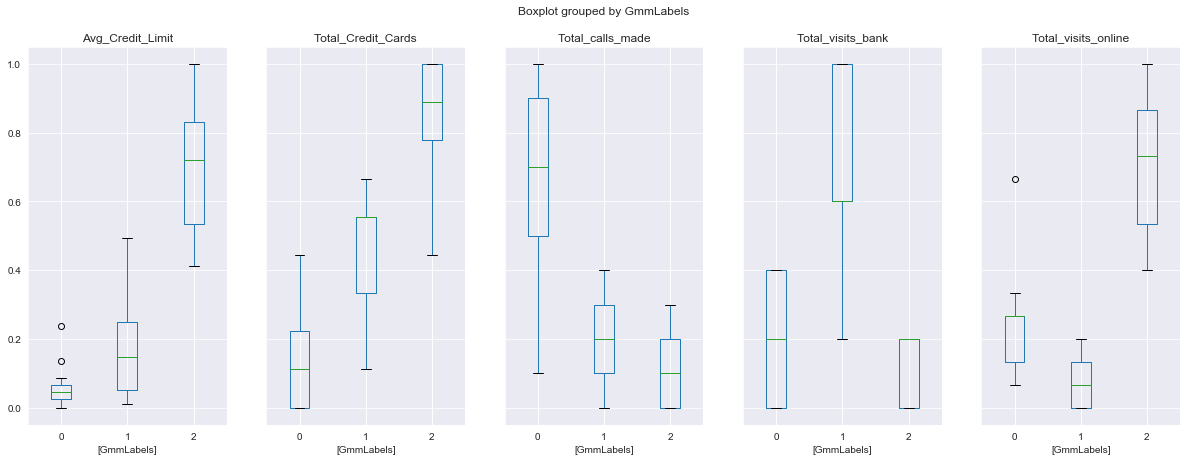

In [23]:
# plotting boxplots with the new GMM based labels

new_features = ["Avg_Credit_Limit",	"Total_Credit_Cards",	"Total_visits_bank",	"Total_visits_online",	"Total_calls_made","GmmLabels"]

df_scaled[new_features].boxplot(by = 'GmmLabels', layout = (1,5),figsize=(20,7))
plt.show()

### 11. Use the DBSCAN clustering with the eps = 0.5 and other parameters as default on the scaled data. Report the number of clusters formed. (3 marks)


In [24]:
from sklearn.cluster import DBSCAN

dbs = DBSCAN(eps = 0.5)

df_scaled['DBSLabels'] = dbs.fit_predict(df_scaled)
df_scaled

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Labels,GmmLabels,DBSLabels
0,0.49,0.11,0.20,0.07,0.00,1,1,0
1,0.24,0.22,0.00,0.67,0.90,0,0,1
2,0.24,0.67,0.20,0.20,0.40,1,1,0
3,0.14,0.44,0.20,0.07,0.40,0,0,1
4,0.49,0.56,0.00,0.80,0.30,2,2,2
...,...,...,...,...,...,...,...,...
639,0.49,1.00,0.20,0.67,0.00,2,2,2
640,0.41,1.00,0.20,0.87,0.20,2,2,2
641,0.72,0.78,0.20,0.60,0.10,2,2,2
642,0.86,1.00,0.20,1.00,0.00,2,2,2


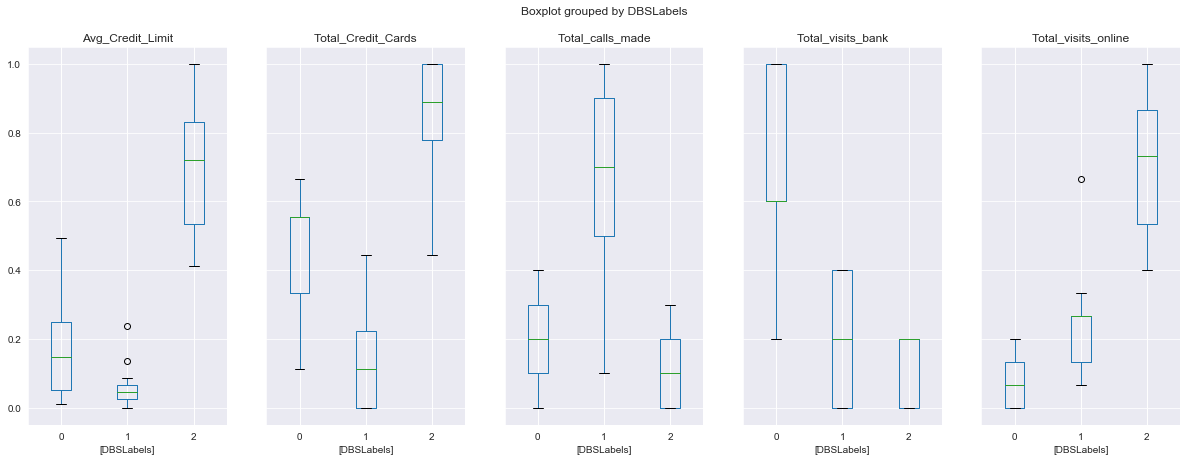

In [25]:
#plotting boxplots with the new DBScan based labels

new_features = ["Avg_Credit_Limit",	"Total_Credit_Cards",	"Total_visits_bank",	"Total_visits_online",	"Total_calls_made","DBSLabels"]

df_scaled[new_features].boxplot(by = 'DBSLabels', layout = (1,5),figsize=(20,7))
plt.show()

### 12. Print the cluster sizes and add comments from the different clustering techniques (3 marks)

- Print the cluster size (2 marks)
- Comments and interpretations (1 mark)



In [26]:
# Use a function that can give the count of all the different values in a column

print('Cluster sizes in Kmeans:')
print(df_scaled['Labels'].value_counts())
print()

print('Cluster sizes in GMM:')
print(df_scaled['GmmLabels'].value_counts())
print()

print('Cluster sizes in DBSCAN')
print(df_scaled['DBSLabels'].value_counts())

Cluster sizes in Kmeans:
1    373
0    222
2     49
Name: Labels, dtype: int64

Cluster sizes in GMM:
1    373
0    222
2     49
Name: GmmLabels, dtype: int64

Cluster sizes in DBSCAN
0    373
1    222
2     49
Name: DBSLabels, dtype: int64


#### Write your comments and interpretations here



if there isn't any problem in my code is here we can see all 3 methods divided the points into the same number in 3 clusters. Maybe the points in each cluster are really simillar and they are diffrent than others and because of that in all three methods we got th same counts. 
